<a href="https://colab.research.google.com/github/billray0259/portfolio/blob/master/Face_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Autoencoder that only Makes Ghosts
Using the UMass created Labeld Faces in the Wild dataset, this autoencoder attempts to learn to encode and recreate human faces.  
As of yet, the model does not do this.  
Instead it generates roughly the same ghostly image regardless of the input image.  
>><img src="https://i.imgur.com/4Y3YMG1.png" alt="Model input and outputs" width="300"/>


Install and import libraries

In [0]:
!pip install tensorflow-gpu
!pip install numpy
!pip install matplotlib
!pip install tqdm
!pip install gdown

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import gdown
import math

<b> This is meaningless in the jupyter notebook. </b>  
I need to find another way to load the data

In [4]:
gdown.download("https://drive.google.com/uc?id=1qYaKf2-chA5HI-oPGN6nUlMJMuO7o17H", "./data.npy", False)

data = np.load("/content/data.npy")
print(np.shape(data))

Downloading...
From: https://drive.google.com/uc?id=1qYaKf2-chA5HI-oPGN6nUlMJMuO7o17H
To: /content/data.npy
127MB [00:00, 129MB/s] 


(4001, 3969)


Create and initialize variables to define the model architecture

In [0]:
epochs = 100
batch_size = 100
scale = 8
img_side_length = 63
img_size = img_side_length**2
stddev = 1
transfer_function = tf.nn.relu

### Structure
The autoencoder is a symetrical network with 8 fully connected layers  
Four layers to encode, four to decode  
### Weight Initialization
I found that initializing the weight matricies to identity matricies plus some noise helped the network learn faster  
This sort of makes sense because the idea of an autoencoder is to not change the input  
I used `leaky relus` to avoid dead relus and fading gradients associated with `sigmoid` and `tanh`

In [0]:
sess = tf.InteractiveSession()

img = tf.placeholder(dtype=tf.float32)

size0 = img_size // scale**1
w0 = tf.Variable(tf.eye(img_size, size0) + tf.truncated_normal([img_size, size0], stddev=stddev))
b0 = tf.Variable(tf.zeros([size0]))
h0 = tf.nn.leaky_relu(tf.matmul(img, w0) + b0)

size1 = img_size // scale**2
w1 = tf.Variable(tf.eye(size0, size1) + tf.truncated_normal([size0, size1], stddev=stddev))
b1 = tf.Variable(tf.zeros([size1]))
h1 = tf.nn.leaky_relu(tf.matmul(h0, w1) + b1)

size2 = img_size // scale**3
w2 = tf.Variable(tf.eye(size1, size2) + tf.truncated_normal([size1, size2], stddev=stddev))
b2 = tf.Variable(tf.zeros([size2]))
h2 = tf.nn.leaky_relu(tf.matmul(h1, w2) + b2)

size3 = img_size // scale**4
w3 = tf.Variable(tf.eye(size2, size3) + tf.truncated_normal([size2, size3], stddev=stddev))
b3 = tf.Variable(tf.zeros([size3]))
h3 = tf.nn.leaky_relu(tf.matmul(h2, w3) + b3)

size4 = img_size // scale**3
w4 = tf.Variable(tf.eye(size3, size4) + tf.truncated_normal([size3, size4], stddev=stddev))
b4 = tf.Variable(tf.zeros([size4]))
h4 = tf.nn.leaky_relu(tf.matmul(h3, w4) + b4)

size5 = img_size // scale**2
w5 = tf.Variable(tf.eye(size4, size5) + tf.truncated_normal([size4, size5], stddev=stddev))
b5 = tf.Variable(tf.zeros([size5]))
h5 = tf.nn.leaky_relu(tf.matmul(h4, w5) + b5)

size6 = img_size // scale**1
w6 = tf.Variable(tf.eye(size5, size6) + tf.truncated_normal([size5, size6], stddev=stddev))
b6 = tf.Variable(tf.zeros([size6]))
h6 = tf.nn.leaky_relu(tf.matmul(h5, w6) + b6)

size7 = img_size // scale**0
w7 = tf.Variable(tf.eye(size6, size7) + tf.truncated_normal([size6, size7], stddev=stddev))
b7 = tf.Variable(tf.zeros([size7]))
output = tf.nn.leaky_relu(tf.matmul(h6, w7) + b7)

# Maybe there is a better loss function to use than mean squard error
loss = tf.losses.mean_squared_error(img, output)
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

sess.run(tf.global_variables_initializer())

### Training the Model
The model is trained for `epoch` epochs with a batch size of `batch_size`  
Every epoch the loss is logged to be graphed later  
Every five epochs the loss is printed

In [7]:
losses = []
for epoch in tqdm(range(epochs)):
    for i in range(len(data)//batch_size):
        train_step.run(feed_dict={
            img: data[i*batch_size:(i+1)*batch_size]
        })
        
    l = loss.eval(feed_dict={
        img: data
    })
    
    losses.append(l)
    
    if epoch % 5 == 0:
        print(l, math.log10(l))

  1%|          | 1/100 [00:01<01:46,  1.07s/it]

0.10599144 -0.9747292155464371


  6%|▌         | 6/100 [00:02<00:36,  2.54it/s]

0.03908701 -1.4079675647010874


 11%|█         | 11/100 [00:03<00:24,  3.69it/s]

0.03914867 -1.4072829911067903


 16%|█▌        | 16/100 [00:04<00:20,  4.04it/s]

0.039137494 -1.407406987963342


 21%|██        | 21/100 [00:06<00:18,  4.22it/s]

0.03913805 -1.4074008286172253


 26%|██▌       | 26/100 [00:07<00:17,  4.22it/s]

0.03917058 -1.4070399773096511


 31%|███       | 31/100 [00:08<00:16,  4.21it/s]

0.039105475 -1.4077624350943252


 36%|███▌      | 36/100 [00:09<00:14,  4.32it/s]

0.03924985 -1.4061620144201141


 41%|████      | 41/100 [00:10<00:13,  4.34it/s]

0.038987443 -1.40907524883588


 46%|████▌     | 46/100 [00:11<00:12,  4.26it/s]

0.03899366 -1.409005995389466


 51%|█████     | 51/100 [00:13<00:11,  4.17it/s]

0.039026894 -1.4086360147795192


 56%|█████▌    | 56/100 [00:14<00:10,  4.19it/s]

0.039058834 -1.4082807220927451


 61%|██████    | 61/100 [00:15<00:09,  4.27it/s]

0.03908279 -1.4080144224966185


 66%|██████▌   | 66/100 [00:16<00:07,  4.32it/s]

0.039096747 -1.407859380588381


 71%|███████   | 71/100 [00:17<00:06,  4.35it/s]

0.039033726 -1.4085599923460768


 76%|███████▌  | 76/100 [00:18<00:05,  4.35it/s]

0.039028525 -1.408617857721579


 81%|████████  | 81/100 [00:20<00:04,  4.34it/s]

0.039064966 -1.4082125477596734


 86%|████████▌ | 86/100 [00:21<00:03,  4.32it/s]

0.03908277 -1.4080146708729622


 91%|█████████ | 91/100 [00:22<00:02,  4.30it/s]

0.039092783 -1.4079034124915362


 96%|█████████▌| 96/100 [00:23<00:00,  4.32it/s]

0.039060898 -1.4082577752232317


100%|██████████| 100/100 [00:24<00:00,  4.32it/s]


Graphs the loss then passes `num_samples` images through the autoencoder to display the output  
This is where the ghost faces come from

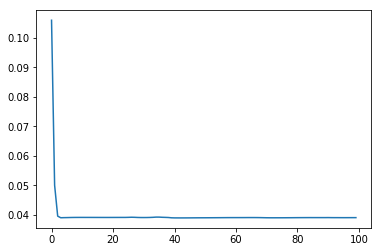

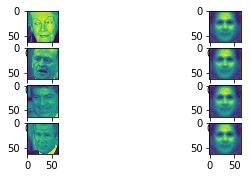

In [8]:
plt.plot(losses)
plt.show()

num_samples = 6

rand_batch = np.random.randint(0, len(data)//batch_size)
display_batch = data[rand_batch * batch_size:(rand_batch + 1) * batch_size]

label = display_batch.reshape([-1, img_side_length, img_side_length])
prediction = output.eval(feed_dict={
    img: display_batch
}).reshape([-1, img_side_length, img_side_length])
for i in range(num_samples-2):
    plt.subplot(num_samples, 2, (i + 2) * 2 + 1)
    plt.imshow(label[i])
    plt.subplot(num_samples, 2, (i + 2) * 2 + 2)
    plt.imshow(prediction[i])
plt.show()